In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

motor_train = pd.read_csv('motor_train.csv')
motor_test = pd.read_csv('motor_test.csv')

motor_train.head(10)
motor_test.head(10)


,class,peak,trough,mean,RMS,Crest_Factor
0,1,0.50823,-0.45133,0.151352,0.187720,2.707387
1,1,0.50823,-0.48971,0.156289,0.192089,2.645803
2,1,0.39308,-0.45133,0.163987,0.202870,1.937596
3,1,0.39308,-0.56647,0.167843,0.211949,1.854599
4,1,0.39473,-0.44968,0.164167,0.202855,1.945871
5,1,0.39473,-0.56483,0.168229,0.211970,1.862199
6,1,0.39473,-0.60321,0.185904,0.231504,1.705069
7,1,0.43311,-0.60321,0.185154,0.232290,1.864521
8,1,0.39308,-0.60486,0.185633,0.231502,1.697954
9,1,0.43146,-0.60486,0.184883,0.232321,1.857169


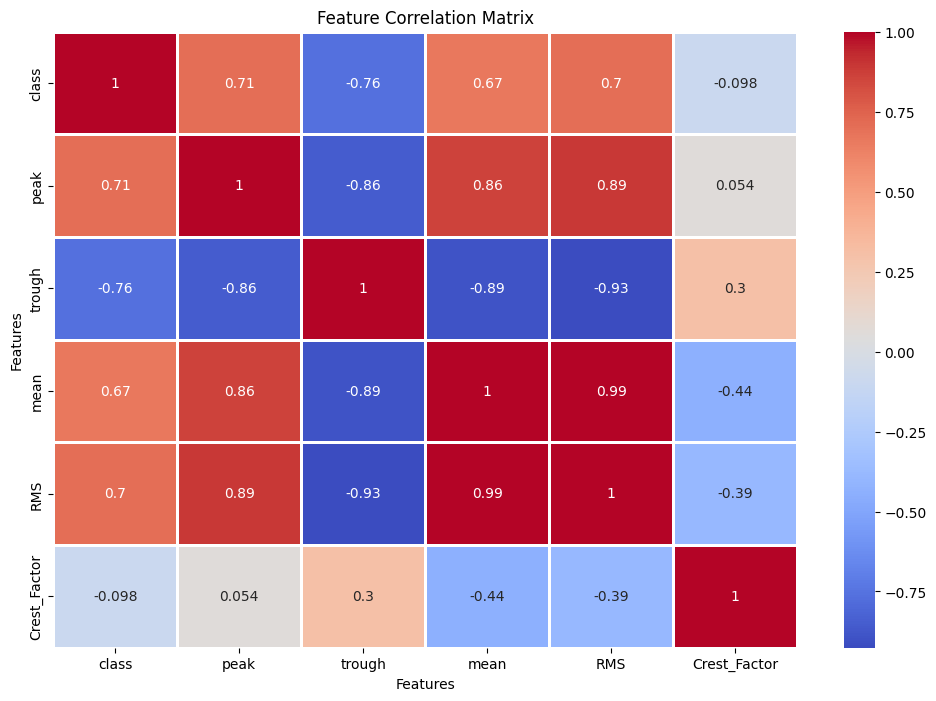

In [5]:
# 상관 관계 계산
correlation_matrix = motor_train.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)

# 그래프 타이틀 및 라벨 설정
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# 그래프 보여주기
plt.show()

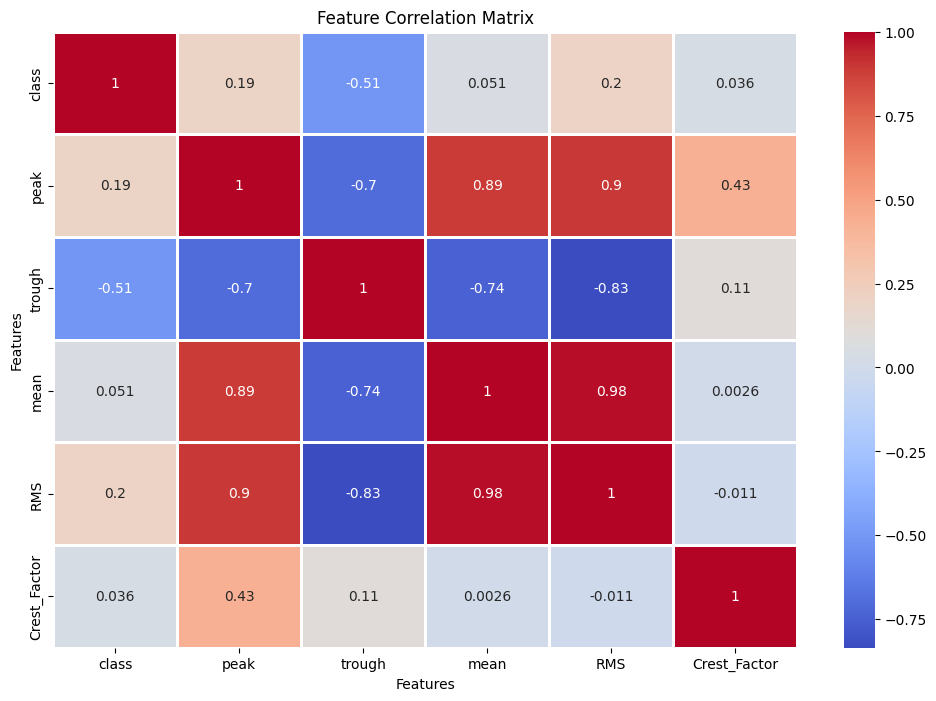

In [6]:
# 상관 관계 계산
correlation_matrix = motor_test.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)

# 그래프 타이틀 및 라벨 설정
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# 그래프 보여주기
plt.show()

Iteration 1, loss = 0.38389314
Iteration 2, loss = 0.28948925
Iteration 3, loss = 0.28029821
Iteration 4, loss = 0.27533452
Iteration 5, loss = 0.27054552
Iteration 6, loss = 0.26997310
Iteration 7, loss = 0.26562638
Iteration 8, loss = 0.26414308
Iteration 9, loss = 0.26483725
Iteration 10, loss = 0.26082220
Iteration 11, loss = 0.26035774
Iteration 12, loss = 0.25783820
Iteration 13, loss = 0.25669894
Iteration 14, loss = 0.25749571
Iteration 15, loss = 0.25465042
Iteration 16, loss = 0.25299530
Iteration 17, loss = 0.25280437
Iteration 18, loss = 0.25100707
Iteration 19, loss = 0.25010496
Iteration 20, loss = 0.24858721
Iteration 21, loss = 0.24803085
Iteration 22, loss = 0.24499460
Iteration 23, loss = 0.24382978
Iteration 24, loss = 0.24309250
Iteration 25, loss = 0.24179418
Iteration 26, loss = 0.23986297
Iteration 27, loss = 0.23872289
Iteration 28, loss = 0.23856326
Iteration 29, loss = 0.23949442
Iteration 30, loss = 0.23823410
Iteration 31, loss = 0.23715569
Iteration 32, los

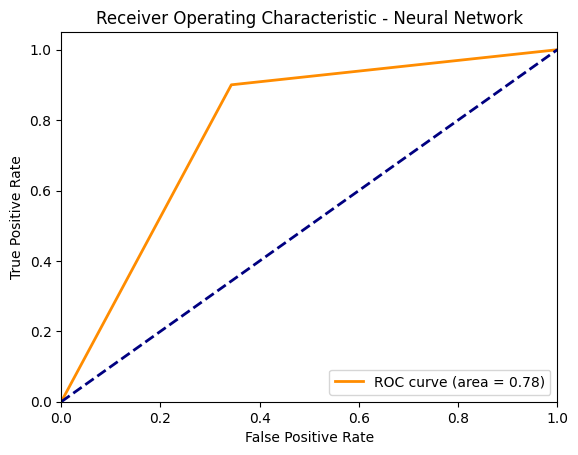

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

x_train = motor_train.drop(["class", "mean"], axis=1)
y_train = motor_train["class"]
x_test = motor_test.drop(["class", "mean"], axis=1)
y_test = motor_test["class"]


#model Create
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=1e-4,
                     solver='sgd', verbose=10, random_state=13, learning_rate_init=0.1)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Logistic Regression model verification
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
clas_report = classification_report(y_test, y_pred)

print(accuracy)
print(recall)
print(precision)
print(f1)
print(conf_matrix)
print(clas_report)

# 테스트 데이터에 대한 예측 확률 계산
y_pred_proba = model.predict_proba(x_test)[:,1]


# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Neural Network')
plt.legend(loc="lower right")
plt.show()





In [49]:
SS = StandardScaler()
MM = MinMaxScaler()

x_train_ss = SS.fit_transform(x_train)
x_test_ss = SS.transform(x_test)

x_train_MM = MM.fit_transform(x_train)
x_test_MM = MM.transform(x_test)

In [44]:
import numpy as np
import os
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform


#Hyper Parameter searching
NN = MLPClassifier(max_iter=1000)

param = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.05),
    'learning_rate_init' : uniform(0.001, 0.1)
}

random_search = RandomizedSearchCV(NN, param, n_iter=100, n_jobs=-1,
                                   cv=2, scoring='roc_auc', random_state=13)
random_search.fit(x_train_ss, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)


Best Parameters: {'activation': 'tanh', 'alpha': 0.02191253160141637, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate_init': 0.0098253540029274, 'solver': 'adam'}
Best AUC Score: 0.9505887702469359


In [46]:
import numpy as np
import os
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform


#Hyper Parameter searching
NN = MLPClassifier(max_iter=1000)

param = {
    'hidden_layer_sizes': [(100,)],
    'activation':  ['relu'],
    'solver': ['adam'],
    'alpha': [0.1],
    'learning_rate_init' : [0.4]
}

grid_search = GridSearchCV(NN, param, n_jobs=-1,
                                   cv=3, scoring='roc_auc')
grid_search.fit(x_train_ss, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)


Best Parameters: {'activation': 'relu', 'alpha': 0.0407, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0605, 'solver': 'adam'}
Best AUC Score: 0.9366840340173567


0.8614421930870083
0.9527622097678142
0.804189896942051
0.8721942281264315
[[3913 1159]
 [ 236 4760]]


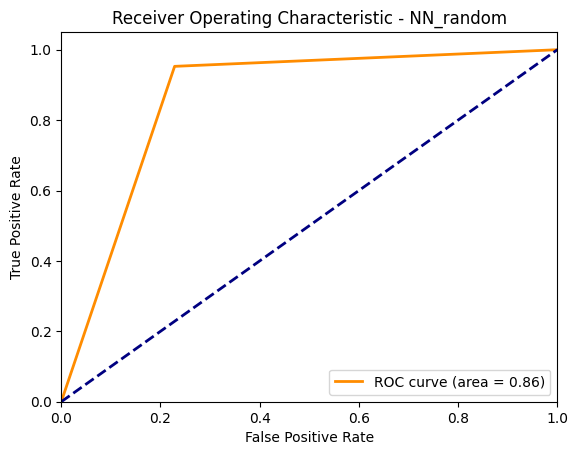

In [45]:
# ROC 커브 계산 basic : y_pred  /  tuning : y_pred_hyper
# ROC 커브 계산 basic : x_train / x_test  /  tuning : y_train / y_test
# x_train_ss / x_test_ss / x_train_MM / x_test_MM

# y_pred = model.predict(x_train_ss)

y_pred_hyper = random_search.best_estimator_.predict(x_test_ss)
y_pred_hyper_prob = random_search.best_estimator_.predict_proba(x_test_ss)[:,1]

accuracy = accuracy_score(y_test, y_pred_hyper)
recall = recall_score(y_test, y_pred_hyper)
precision = precision_score(y_test, y_pred_hyper)
f1 = f1_score(y_test, y_pred_hyper)
conf_matrix = confusion_matrix(y_test, y_pred_hyper)

print(accuracy)
print(recall)
print(precision)
print(f1)
print(conf_matrix)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_hyper)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - NN_random')
plt.legend(loc="lower right")

path = os.path.join('motor_images_' + 'tuning(1000)_test_SS_3' + '.png')
plt.savefig(path, dpi=300, format='png')

0.8449543106873262
0.9813851080864692
0.769580913514362
0.8626726488959269
[[3604 1468]
 [  93 4903]]


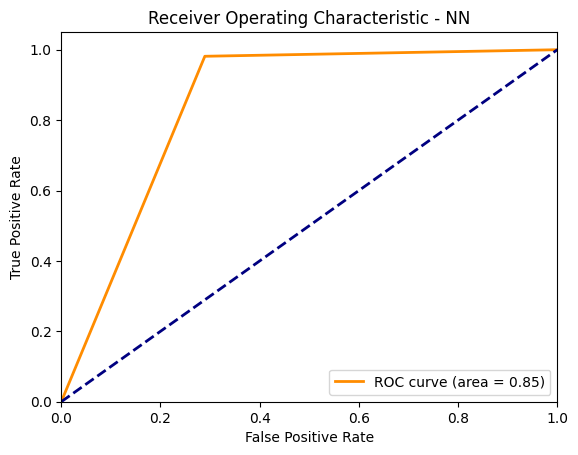

In [47]:
# ROC 커브 계산 basic : y_pred  /  tuning : y_pred_hyper
# ROC 커브 계산 basic : x_train / x_test  /  tuning : y_train / y_test
# x_train_ss / x_test_ss / x_train_MM / x_test_MM

# y_pred = model.predict(x_train_ss)

y_pred_hyper = grid_search.best_estimator_.predict(x_test_ss)
y_pred_hyper_prob = grid_search.best_estimator_.predict_proba(x_test_ss)[:,1]

accuracy = accuracy_score(y_test, y_pred_hyper)
recall = recall_score(y_test, y_pred_hyper)
precision = precision_score(y_test, y_pred_hyper)
f1 = f1_score(y_test, y_pred_hyper)
conf_matrix = confusion_matrix(y_test, y_pred_hyper)

print(accuracy)
print(recall)
print(precision)
print(f1)
print(conf_matrix)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_hyper)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - NN')
plt.legend(loc="lower right")

path = os.path.join('motor_images_' + 'tuning(1000)_test_SS(grid)_3' + '.png')
plt.savefig(path, dpi=300, format='png')